In [6]:
import requests
import collections
from bs4 import BeautifulSoup



In [7]:
from urllib.parse import urljoin
#相对路径转绝对路径
def absolute_urls(url,relative_url):
    return urljoin(url,relative_url)

In [8]:

def get_source_page_html(urls):
    headers = {"User-Agent" : "User-Agent:Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; Trident/5.0;"}
    r = requests.get(urls, headers=headers).content.decode('utf8')
    return r

    
   

In [9]:
def list_stations(each_line_souce_page):
    ##很难用一种过滤方式找到正确的所有站点，这里用了笨的办法，用两种过滤方式，然后用Max,每条线取找到最多站点的。
    soup=BeautifulSoup(each_line_souce_page,'html.parser')
    eachline_stations_one=[]
    eachline_stations_two=[]
    eachline_stations=[]

    x=soup.find_all('table',attrs={'data-sort':'sortDisabled'})
    for table in x:
        title=table.find('caption')
        if title==None:continue
        if title.string==None:continue
        if title.string[-1]=="表":
            stationlist=table.find_all('a')
            for i in stationlist:
                if i.string==None:continue
                if i.string[-1] =='站':
                    eachline_stations_one.append(i.string)
    y=soup.find('table',attrs={'data-sort':'sortDisabled'})
    stationlist_two = y.find_all('a')
    for i in stationlist_two:
        if i.string == None: continue
        if i.string[-1] == '站':
            eachline_stations_two.append(i.string)
    return max(eachline_stations_one,eachline_stations_two,key=lambda k: len(k))


def find_lines_with_stations():
    lines_and_stations=collections.defaultdict(list)
    url='https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485'
    soup = BeautifulSoup(get_source_page_html(url), 'html.parser')
    table=soup.find('table',attrs={'width':'658'})
    lines=table.find_all('a')
    lines.pop()
    for line in lines:
        lines_and_stations[line.string]=list_stations(get_source_page_html(absolute_urls(url,(line.get('href')))))
    return lines_and_stations        
    

In [25]:
t=find_lines_with_stations()

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
l=t.values()

In [53]:
allstations=[]
for i in l:
    for x in i:
        allstations.append(x)
        

In [54]:
allstations

['黑石头站',
 '高井站',
 '福寿岭站',
 '苹果园站',
 '古城站',
 '八角游乐园站',
 '八宝山站',
 '玉泉路站',
 '五棵松站',
 '万寿路站',
 '公主坟站',
 '军事博物馆站',
 '木樨地站',
 '南礼士路站',
 '复兴门站',
 '西单站',
 '天安门西站',
 '天安门东站',
 '王府井站',
 '东单站',
 '建国门站',
 '永安里站',
 '国贸站',
 '大望路站',
 '四惠站',
 '四惠东站',
 '西直门站',
 '积水潭站',
 '鼓楼大街站',
 '安定门站',
 '雍和宫站',
 '东直门站',
 '东四十条站',
 '朝阳门站',
 '建国门站',
 '北京站',
 '崇文门站',
 '前门站',
 '和平门站',
 '宣武门站',
 '长椿街站',
 '复兴门站',
 '阜成门站',
 '车公庄站',
 '天宫院站',
 '安河桥北站',
 '天宫院站',
 '生物医药基地站',
 '义和庄站',
 '黄村火车站',
 '黄村西大街站',
 '清源路站',
 '枣园站',
 '高米店南站',
 '高米店北站',
 '西红门站',
 '新宫站',
 '公益西桥站',
 '角门西站',
 '马家堡站',
 '北京南站',
 '陶然亭站',
 '菜市口站',
 '宣武门站',
 '西单站',
 '灵境胡同站',
 '西四站',
 '平安里站',
 '新街口站',
 '西直门站',
 '动物园站',
 '国家图书馆站',
 '魏公村站',
 '人民大学站',
 '海淀黄庄站',
 '中关村站',
 '北京大学东门站',
 '圆明园站',
 '西苑站',
 '北宫门站',
 '安河桥北站',
 '宋家庄站',
 '刘家窑站',
 '蒲黄榆站',
 '天坛东门站',
 '磁器口站',
 '崇文门站',
 '东单站',
 '灯市口站',
 '东四站',
 '张自忠路站',
 '北新桥站',
 '雍和宫站',
 '和平里北街站',
 '和平西桥站',
 '惠新西街南口站',
 '惠新西街北口站',
 '大屯路东站',
 '北苑路北站',
 '立水桥南站',
 '立水桥站',
 '天通苑南站',
 '天通苑站',
 '天通苑北站',
 '金安桥站',
 '苹果园站',
 '田村站',
 '海淀五路居站'

In [55]:
all_stations=set(allstations)
len(all_stations)

309

In [56]:
def distance(element1,element2):
    for sublist in l:
        if element1 in sublist and element2 in sublist:
            return abs(sublist.index(element1)-sublist.index(element2))
    

In [58]:
from collections import defaultdict
stations_connection=defaultdict(list)

for station_one in all_stations:
    for station_two in all_stations:
        if station_one==station_two:continue
        if distance(station_one,station_two)==1:
            stations_connection[station_one].append(station_two)
stations_connection
            


defaultdict(list,
            {'什刹海站': ['南锣鼓巷站', '鼓楼大街站'],
             '德茂站': ['五福堂站', '瀛海站'],
             '天通苑南站': ['立水桥站', '天通苑站'],
             '双桥站': ['管庄站', '传媒大学站'],
             '大井站': ['七里庄站', '郭庄子站'],
             '梨园站': ['九棵树站', '临河里站'],
             '十里堡站': ['青年路站', '金台路站'],
             '安德里北街站': ['鼓楼大街站', '安华桥站'],
             '长椿街站': ['复兴门站', '宣武门站'],
             '北土城站': ['奥体中心站', '健德门站', '安贞门站', '安华桥站'],
             '西单站': ['天安门西站', '灵境胡同站', '复兴门站', '宣武门站'],
             '西四站': ['灵境胡同站', '平安里站'],
             '物资学院路站': ['通州北关站', '草房站'],
             '昌平站': ['昌平东关站', '昌平北站'],
             '广渠门内站': ['磁器口站', '广渠门外站'],
             '善各庄站': ['来广营站'],
             '亦庄文化园站': ['万源街站', '亦庄桥站'],
             '高碑店站': ['传媒大学站', '四惠东站'],
             '生命科学园站': ['西二旗站', '朱辛庄站'],
             '车公庄西站': ['车公庄站', '二里沟站'],
             '呼家楼站': ['团结湖站', '金台路站', '东大桥站', '金台夕照站'],
             '郭公庄站': ['首经贸站', '丰台科技园站', '大葆台站'],
             '团结湖站': ['呼家楼站', '农业展览馆站'],
             '纪家庙站'

/Users/kaifeng/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


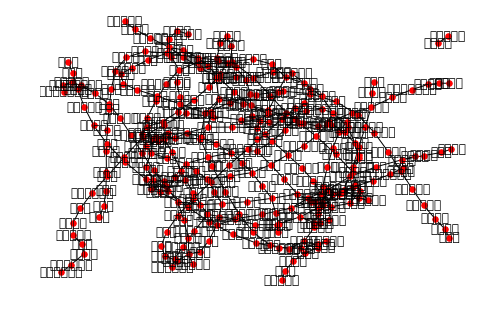

In [67]:

stations_connection_graph=nx.Graph(stations_connection)
nx.draw(stations_connection_graph,with_labels=True,node_size=30)


In [1]:
!ls


10k_articles.txt
80k_articles.txt
Lecture-01-An Introduction to AI-ustccheng02.ipynb
Lecture-01-An Introduction to AI.ipynb
Lecture-2-Language-Model.ipynb
Lesson-03-Best-First-Search-and-A-Start-Search.ipynb
Lesson-03.pdf
Lesson-04--Dynamic-Programming-Rod-Cutting-Edit-Distance.ipynb
Untitled.ipynb
Untitled1.ipynb
Untitled2.ipynb
Untitled3.ipynb
Untitled4.ipynb
Untitled5.ipynb
assignment3.ipynb
lesson01-Part01.pdf
lesson01-Part02.pdf
lesson01.pdf
simple_machine_leanring.py
soucepage.txt


In [15]:
L=open('10k_articles.txt')
L


<_io.TextIOWrapper name='10k_articles.txt' mode='r' encoding='UTF-8'>

In [4]:
os.listdir()

NameError: name 'os' is not defined